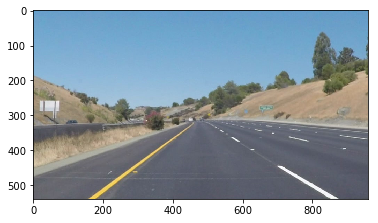

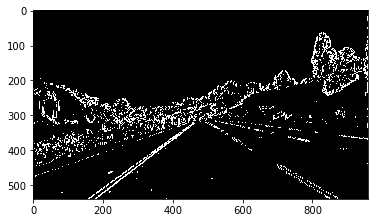

In [4]:
# cv2 Sobel Operator

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread('/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/02. Project (Finding Lane)/CarND-LaneLines-P1-master/test_images/solidYellowCurve2.jpg')
plt.imshow(img)
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Calculate the derivative in the x direction (the 1, 0 at the end denotes x direction):
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0)

# Calculate the derivative in the y direction (the 0, 1 at the end denotes y direction):
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

abs_sobelx = np.absolute(sobelx)

# Note: 
# It's not entirely necessary to convert to 8-bit (range from 0 to 255) but in practice, 
# it can be useful in the event that you've written a function to apply a particular threshold, and 
# you want it to work the same on input images of different scales, like jpg vs. png. 
# You could just as well choose a different standard range of values, like 0 to 1 etc. 
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))


# x_direction
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')


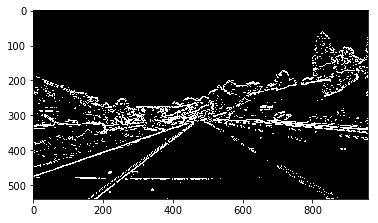

In [3]:
# y_direction
abs_sobely = np.absolute(sobely)
scaled_sobel = np.uint8(255*abs_sobely/np.max(abs_sobely))

thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')


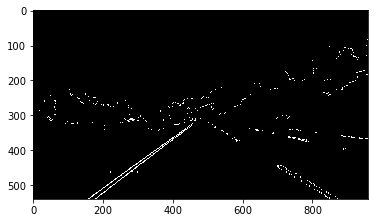

In [5]:
# x*y 
abs_sobel_xy = abs_sobelx * abs_sobely
scaled_sobel = np.uint8(255*abs_sobel_xy/np.max(abs_sobel_xy))

thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')

In [54]:


def abs_sobel_thresh(img, thresh_min=0, thresh_max=255):

    plt.imshow(img)
    plt.show()
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply cv2.Sobel()
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0,1)
    
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    abs_sobelxy = (abs_sobelx * abs_sobely)

    # Scale the result to an 8-bit range (0-255)
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))
    scaled_sobelxy = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))

    # Apply lower and upper thresholds
    thresh_min = thresh_min
    thresh_max = thresh_max

    # Create binary_output
    binary_output_x = np.zeros_like(scaled_sobelx)
    binary_output_y = np.zeros_like(scaled_sobely)
    binary_output_xy = np.zeros_like(scaled_sobelxy)

    binary_output_x[(scaled_sobelx >= thresh_min) & (scaled_sobelx <= thresh_max)] = 1
    binary_output_y[(scaled_sobely >= thresh_min) & (scaled_sobely <= thresh_max)] = 1
    binary_output_xy[(scaled_sobelxy >= thresh_min) & (scaled_sobelxy <= thresh_max)] = 1

    plt.figure(figsize=(25,15))
    plt.subplot(131)
    plt.imshow(binary_output_x, cmap='gray')
    plt.subplot(132)
    plt.imshow(binary_output_y, cmap='gray')
    plt.subplot(133)
    plt.imshow(binary_output_xy, cmap='gray')
    
    return binary_output_x, binary_output_y, binary_output_xy

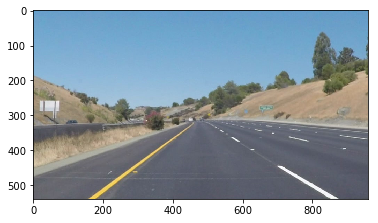

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

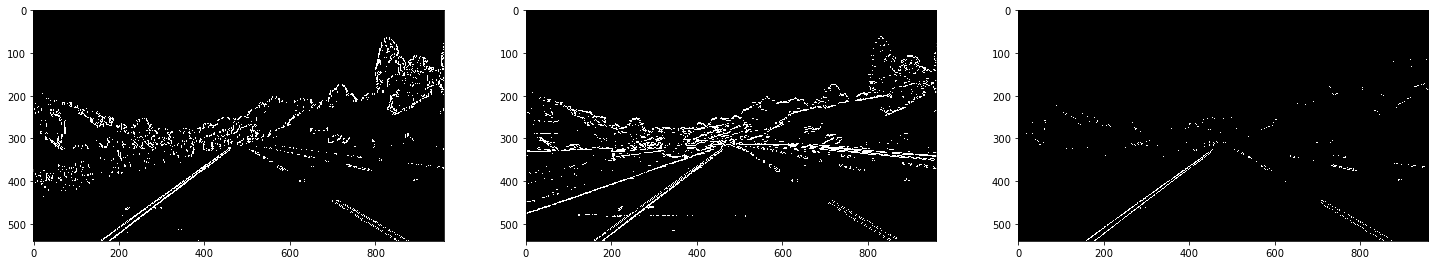

In [55]:

img = plt.imread('/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/02. Project (Finding Lane)/CarND-LaneLines-P1-master/test_images/solidYellowCurve2.jpg')
abs_sobel_thresh(img, thresh_min=30, thresh_max=100)

In [29]:

def abs_sobel_thresh_orient(img, orient='x', thresh_min=0, thresh_max=255):

    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply cv2.Sobel()
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1,0)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0,1)
    
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobel = np.absolute(sobel)

    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    # Apply lower and upper thresholds
    thresh_min = thresh_min
    thresh_max = thresh_max

    # Create binary_output
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    return binary_output

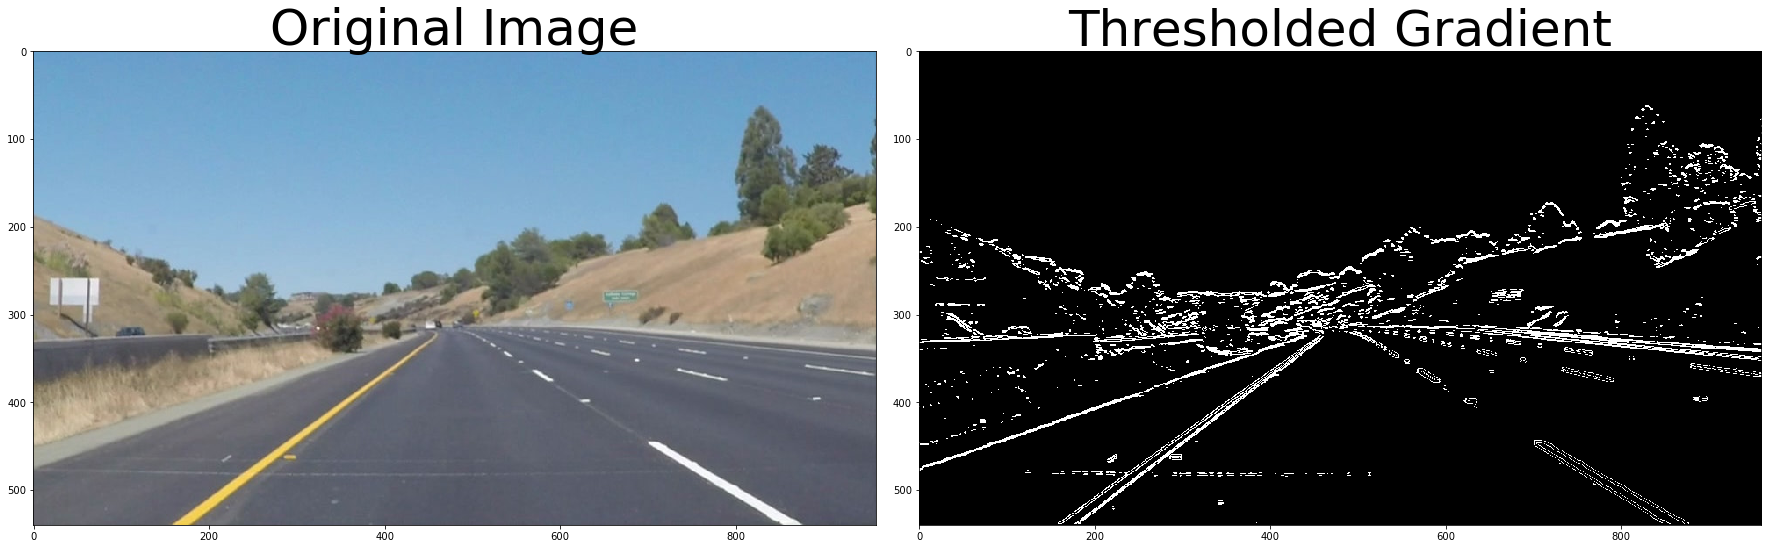

In [47]:
img = plt.imread('/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/02. Project (Finding Lane)/CarND-LaneLines-P1-master/test_images/solidYellowCurve2.jpg')
grad_binary = abs_sobel_thresh_orient(img, orient='y', thresh_min=30, thresh_max=100)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [56]:
# It's also worth considering the size of the region in the image over which you'll be taking the gradient. 
# You can modify the kernel size for the Sobel operator to change the size of this region. 
# Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. 
# The default Sobel kernel size is 3, but here you'll define a new function that takes kernel size as a parameter (must be an odd number!)
#
# The function you'll define for the exercise below should take in an image and optional Sobel kernel size, 
# as well as thresholds for gradient magnitude. 
#
# Next, you'll compute the gradient magnitude, apply a threshold, and create a binary output image showing where thresholds were met. 

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=sobel_kernel)
    
    # Calculate the magnitude 
    abs_sobel = np.absolute(np.sqrt(sobelx**2 + sobely**2))              # <=== 

    # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    # Apply lower and upper thresholds
    thresh_min = mag_thresh[0]
    thresh_max = mag_thresh[1]

    # Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    return binary_output


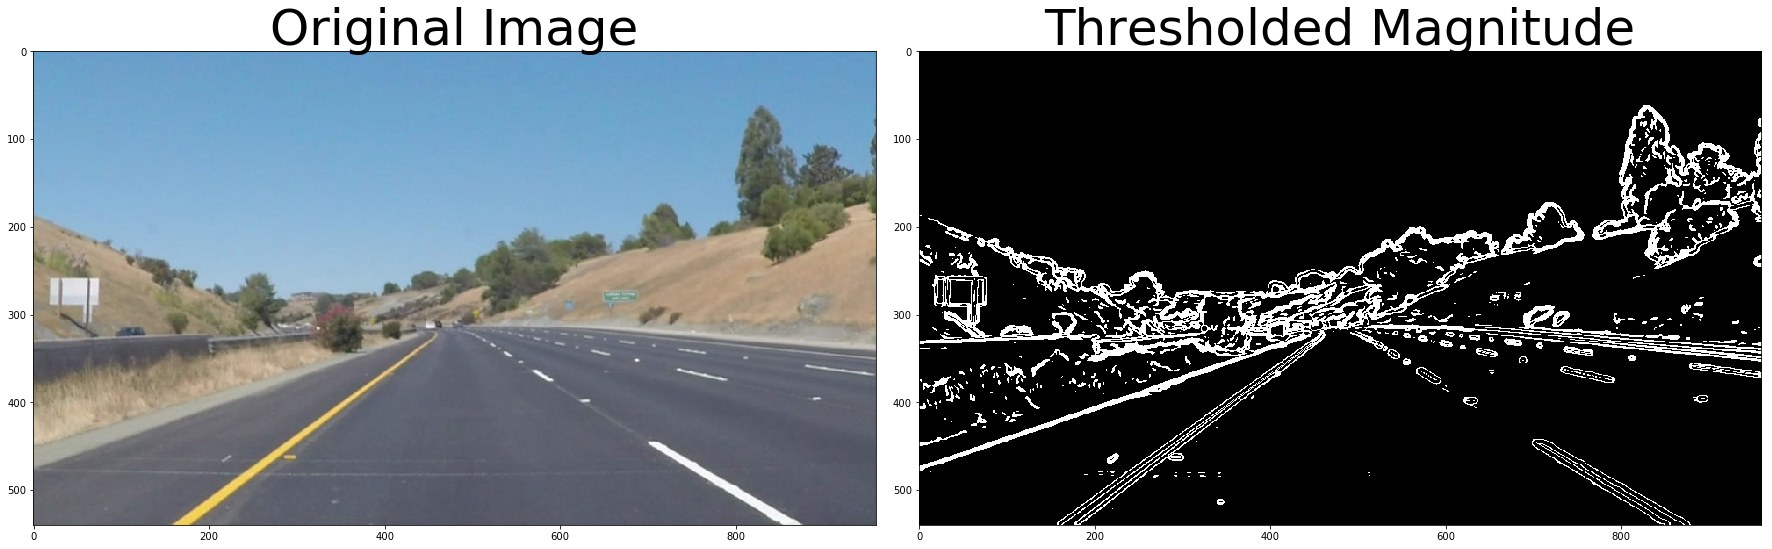

In [58]:
img = plt.imread('/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/02. Project (Finding Lane)/CarND-LaneLines-P1-master/test_images/solidYellowCurve2.jpg')
mag_binary = mag_thresh(img, sobel_kernel=9, mag_thresh=(30, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=sobel_kernel)
    
    # Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)               
    abs_sobely = np.absolute(sobely)               

    # Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    atan = np.arctan2(abs_sobely, abs_sobelx)
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(atan)
    binary_output[(atan > thresh[0]) & (atan < thresh[1])] = 1
    
    return binary_output


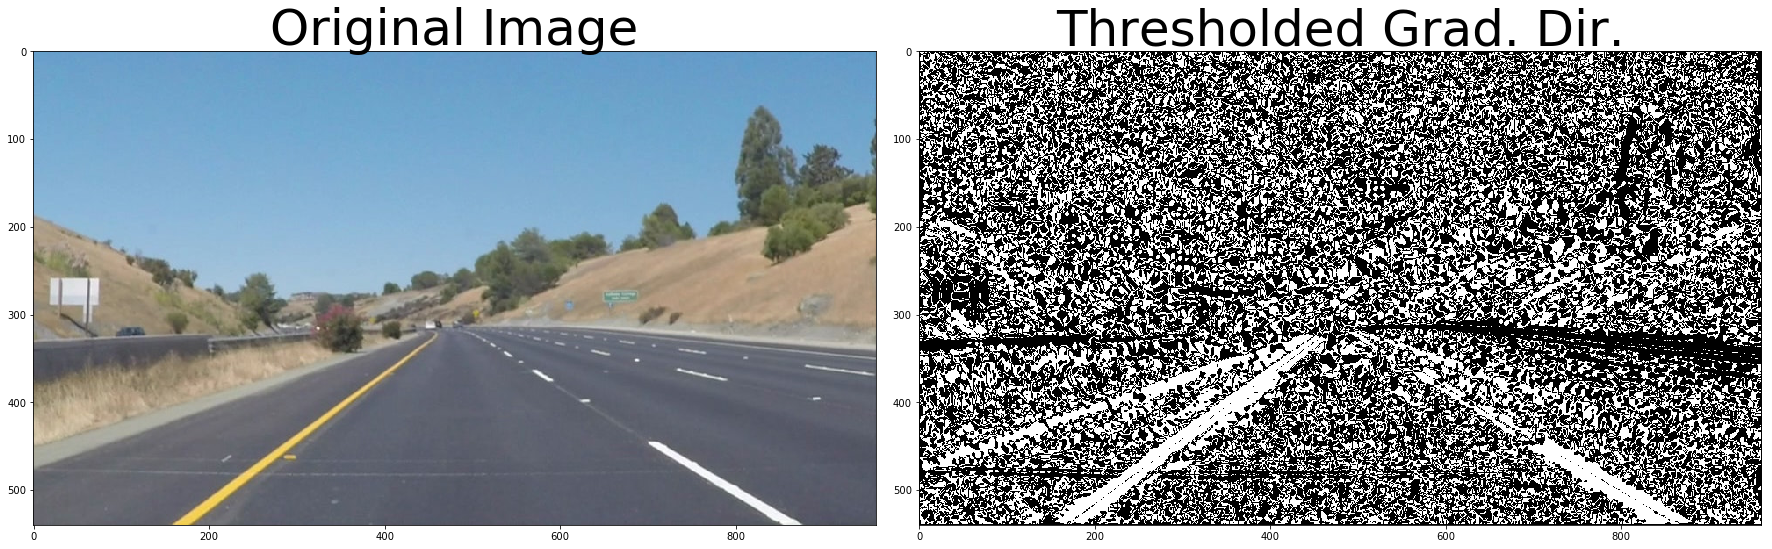

In [28]:
img = plt.imread('/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/02. Project (Finding Lane)/CarND-LaneLines-P1-master/test_images/solidYellowCurve2.jpg')

# Run the function
dir_binary = dir_threshold(img, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [33]:



def abs_sobel_thresh_orient(img, orient='x', thresh=(0, 255)):

    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply cv2.Sobel()
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1,0)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0,1)
    
    # Take the absolute value of the output from cv2.Sobel()
    abs_sobel = np.absolute(sobel)

    # Scale the result to an 8-bit range (0-255)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    # Apply lower and upper thresholds
    thresh_min = thresh[0]
    thresh_max = thresh[1]

    # Create binary_output
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    return binary_output


# It's also worth considering the size of the region in the image over which you'll be taking the gradient. 
# You can modify the kernel size for the Sobel operator to change the size of this region. 
# Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. 
# The default Sobel kernel size is 3, but here you'll define a new function that takes kernel size as a parameter (must be an odd number!)
#
# The function you'll define for the exercise below should take in an image and optional Sobel kernel size, 
# as well as thresholds for gradient magnitude. 
#
# Next, you'll compute the gradient magnitude, apply a threshold, and create a binary output image showing where thresholds were met. 

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=sobel_kernel)
    
    # Calculate the magnitude 
    abs_sobel = np.absolute(np.sqrt(sobelx**2 + sobely**2))              # <=== 

    # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    # Apply lower and upper thresholds
    thresh_min = mag_thresh[0]
    thresh_max = mag_thresh[1]

    # Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    return binary_output


# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, atan_thresh=(0, np.pi/2)):
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize=sobel_kernel)
    
    # Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)               
    abs_sobely = np.absolute(sobely)               

    # Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    atan = np.arctan2(abs_sobely, abs_sobelx)
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(atan)
    binary_output[(atan > atan_thresh[0]) & (atan < atan_thresh[1])] = 1
    
    return binary_output

In [198]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

img = plt.imread('/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/02. Project (Finding Lane)/CarND-LaneLines-P1-master/test_images/solidYellowCurve2.jpg')

ksize = 11

grad_binary_x = abs_sobel_thresh_orient(img, orient='x', thresh=(40, 100))
grad_binary_y = abs_sobel_thresh_orient(img, orient='y', thresh=(40, 100))
mag_binary = mag_thresh(img, sobel_kernel=ksize, mag_thresh=(40, 100))
dir_binary = dir_threshold(img, sobel_kernel=ksize, atan_thresh=(0.90, 1.20))
comb_binary = np.zeros_like(dir_binary)

#comb_binary[((grad_binary_x == 1) & (grad_binary_y == 1)) ] = 1
#comb_binary[ ((mag_binary == 1) & (dir_binary == 1))] = 1

comb_binary[((grad_binary_x == 1) & (grad_binary_y == 1) & (dir_binary == 1)) ] = 1
#comb_binary[((grad_binary_x == 1) & (grad_binary_y == 1) & (dir_binary == 1)) & (mag_binary == 1)] = 1
#comb_binary[ ((mag_binary == 1) & (dir_binary == 1))] = 1
#comb_binary[((grad_binary_x == 1) & (grad_binary_y == 1) & (mag_binary == 1))] = 1
#comb_binary[((grad_binary_x == 1) & (grad_binary_y == 1)) & ((mag_binary == 1) & (dir_binary == 1))] = 1
#comb_binary[((grad_binary_x == 1) & (grad_binary_y == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

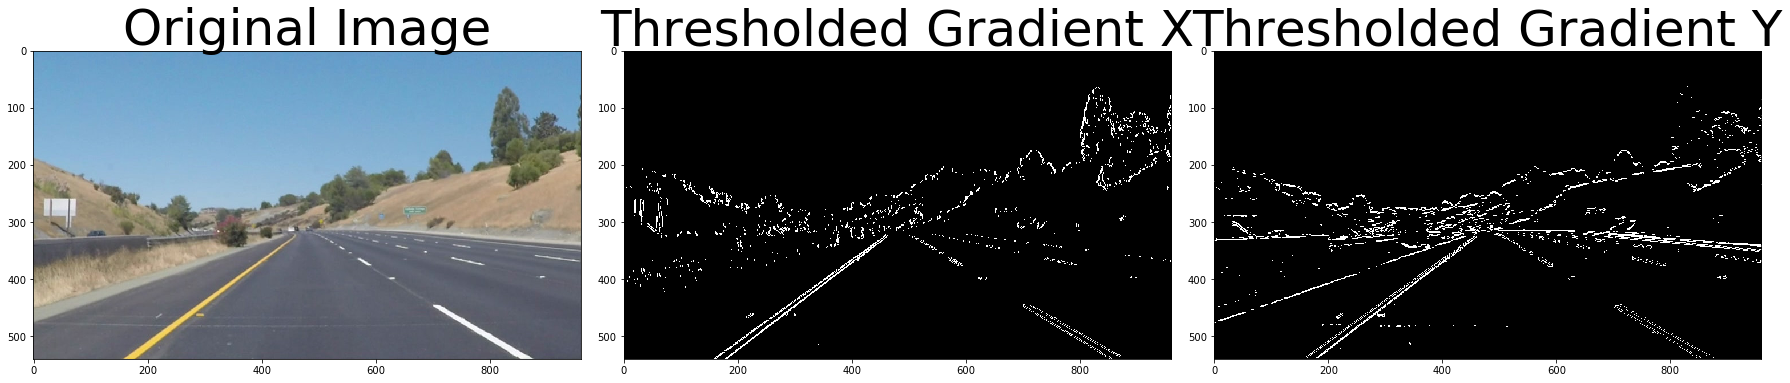

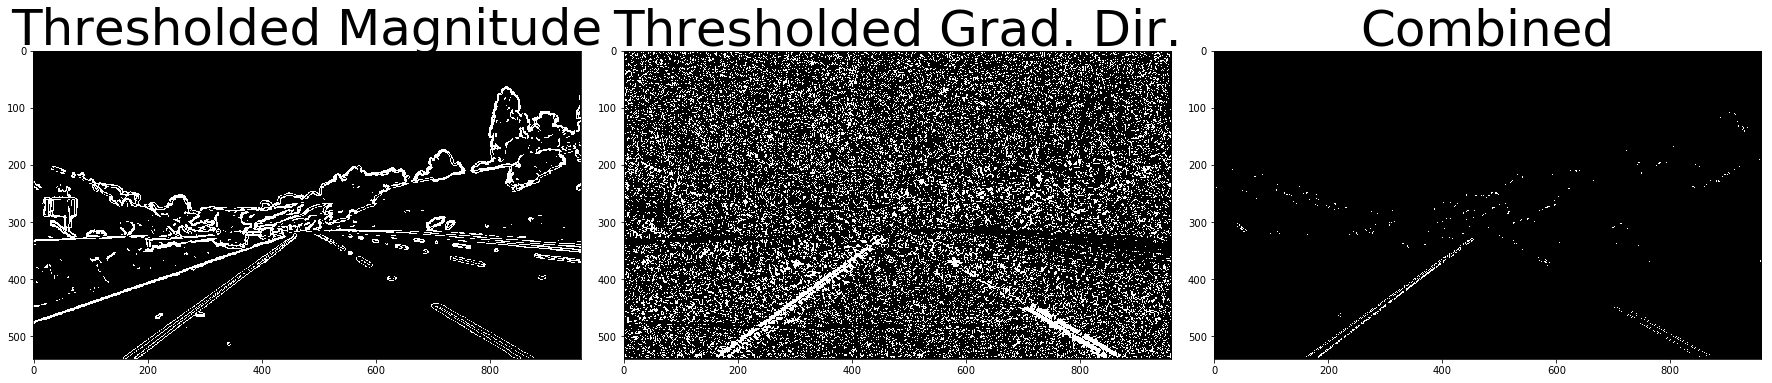

In [199]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary_x, cmap='gray')
ax2.set_title('Thresholded Gradient X', fontsize=50)
ax3.imshow(grad_binary_y, cmap='gray')
ax3.set_title('Thresholded Gradient Y', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

f, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax4.imshow(mag_binary, cmap='gray')
ax4.set_title('Thresholded Magnitude', fontsize=50)
ax5.imshow(dir_binary, cmap='gray')
ax5.set_title('Thresholded Grad. Dir.', fontsize=50)
ax6.imshow(comb_binary, cmap='gray')
ax6.set_title('Combined', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:
# Now you can see that, the S channel is still doing a fairly robust job of picking up the lines 
# under very different color and contrast conditions, while the other selections look messy. 
# You could tweak the thresholds and get closer in the other channels, but the S channel is preferable 
# because it is more robust to changing conditions.

# It's worth noting, however, that the R channel still does rather well on the white lines, 
# perhaps even better than the S channel. 
# As with gradients, it's worth considering how you might combine various color thresholds to make the most robust 
# identification of the lines.


In [204]:

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    
    # 2) Apply a threshold to the S channel
    binary_output = np.zeros_like(S)
    binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1
    
    return binary_output



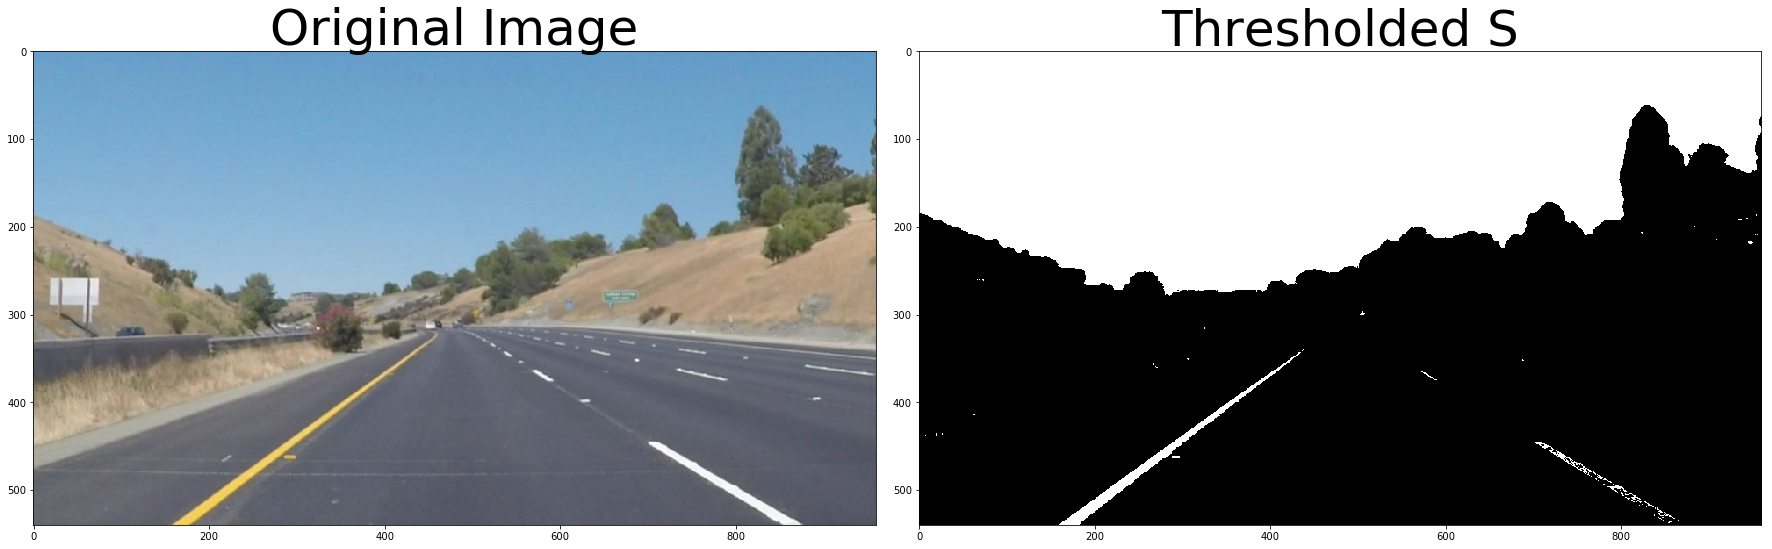

In [205]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
img = plt.imread('/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/02. Project (Finding Lane)/CarND-LaneLines-P1-master/test_images/solidYellowCurve2.jpg')

hls_binary = hls_select(img, thresh=(90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [ ]:







thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

In [ ]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1